Looking at FOS data, maybe write a script to turn it into one file if that's reasonable. Also look at IGRNS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/'
%ls '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos'

y16u0502t_c0f.fits*  y16u0502t_c7f.fits*  y16u0503t_c4f.fits*
y16u0502t_c1f.fits*  y16u0502t_cqf.fits*  y16u0503t_c5f.fits*
y16u0502t_c2f.fits*  y16u0503t_c0f.fits*  y16u0503t_c7f.fits*
y16u0502t_c4f.fits*  y16u0503t_c1f.fits*  y16u0503t_cqf.fits*
y16u0502t_c5f.fits*  y16u0503t_c2f.fits*


In [3]:
calfiles = glob.glob('{}*c*.fits'.format(path))
calfiles

['/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0502t_c0f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0502t_c1f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0502t_c2f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0502t_c4f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0502t_c5f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0502t_c7f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0502t_cqf.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0503t_c0f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0503t_c1f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0503t_c2f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0503t_c4f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0503t_c5f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0503t_c7f.fits',
 '/media/david/2tb_ext_hd/hddata/eg_uma/hst/fos/y16u0503t_cqf.fits']

In [4]:
rootnames = []
for cal in calfiles:
    rootnames.append(fits.getheader(cal, 0)['ROOTNAME'].lower())
rootnames = np.unique(rootnames)
print(rootnames)

['y16u0502t' 'y16u0503t']


In [5]:
fits.getdata(calfiles[0])

array([[-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797],
       [-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797],
       [-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797],
       [-1102.0494, -1100.2944, -1098.5396, ...,  2507.7324,  2509.456 ,
         2511.1797]], dtype=float32)

In [6]:
fits.getheader(calfiles[0])

SIMPLE  =                    T / FITS STANDARD                                  
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 2064 /                                                
NAXIS2  =                    4 /                                                
EXTEND  =                    T / There maybe standard extensions                
BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =                0.0E0 /                                                
OPSIZE  =                  832 / PSIZE of original image                        
ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     
FITSDATE= '2004-02-20'         / Date FITS file was created                     
FILENAME= 'y16u0502t_cvt.c0h'  / Original filename                              
ALLG-MAX=           2.511180

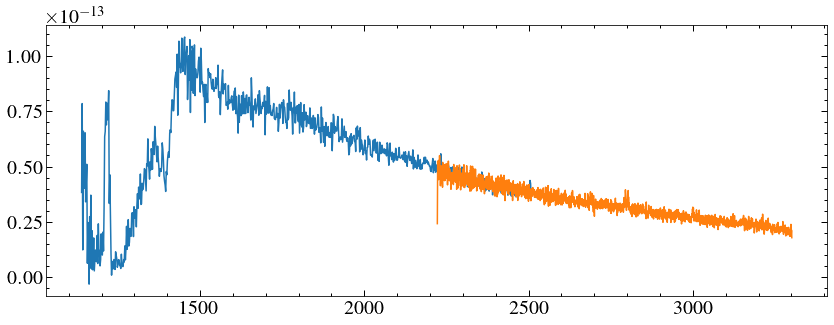

In [7]:
for rootname in rootnames:
    w = fits.getdata('{}{}_c0f.fits'.format(path, rootname))[0]
    f = fits.getdata('{}{}_c1f.fits'.format(path, rootname))[0]
    e = fits.getdata('{}{}_c2f.fits'.format(path, rootname))[0]
    q = fits.getdata('{}{}_cqf.fits'.format(path, rootname))[0]
    plt.plot(w[q<200],f[q<200])  
    # plt.plot(w[q<200],e[q<200])  
    # plt.show()
    # plt.plot(w, q)
    # plt.show()

(2.7e-14, 4.3e-14)

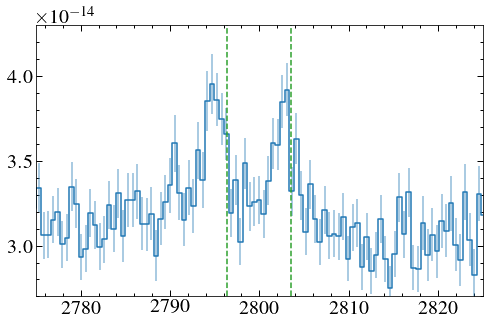

In [8]:
mglines = [2796.35, 2803.53]

plt.figure(figsize=(8,5))
for rootname in rootnames[1:2]:
    w = fits.getdata('{}{}_c0f.fits'.format(path, rootname))[0]
    f = fits.getdata('{}{}_c1f.fits'.format(path, rootname))[0]
    e = fits.getdata('{}{}_c2f.fits'.format(path, rootname))[0]
    q = fits.getdata('{}{}_cqf.fits'.format(path, rootname))[0]
    plt.step(w[q<200],f[q<200], where='mid')
    plt.errorbar(w[q<200], f[q<200], yerr=e[q<200], ls='none', c='C0', alpha =0.5)
[plt.axvline(line, ls='--', c='C2') for line in mglines]    
plt.xlim(2775, 2825)
plt.ylim(2.7e-14, 4.3e-14)

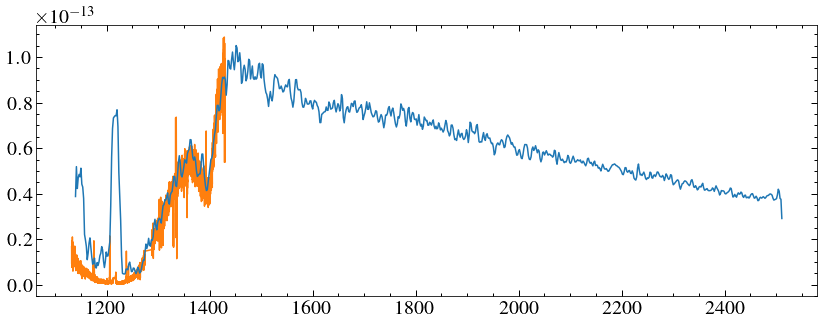

In [9]:
#compare with cos?

smooth =2
for rootname in rootnames[0:1]:
    w = fits.getdata('{}{}_c0f.fits'.format(path, rootname))[0]
    f = fits.getdata('{}{}_c1f.fits'.format(path, rootname))[0]
    e = fits.getdata('{}{}_c2f.fits'.format(path, rootname))[0]
    q = fits.getdata('{}{}_cqf.fits'.format(path, rootname))[0]
    f = convolve(f,Box1DKernel(smooth))
    e = convolve(e,Box1DKernel(smooth))/(smooth**0.5)
    plt.plot(w[q<200],f[q<200])  

cpath = '/media/david/2tb_ext_hd/hddata/eg_uma/hst/cos/'
x = glob.glob('{}*x1dsum.fits'.format(cpath))[0]

smooth=5
data = fits.getdata(x, 1)
w = np.array([], dtype=float)
f = np.array([], dtype=float)
e = np.array([], dtype=float)
for dt in data[::-1]:
    wi, fi, ei, dq = dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['DQ']
    mask = (fi>0) & (dq == 0) & (wi < 1213) | (wi > 1217) & (fi>0) & (dq == 0) 
   # mask = (dq==0)
    wi, fi, ei = wi[mask], fi[mask], ei[mask]
    w = np.concatenate((w, wi))
    f = np.concatenate((f, fi))
    e = np.concatenate((e, ei)) 

f = convolve(f,Box1DKernel(smooth))
e = convolve(e,Box1DKernel(smooth))/(smooth**0.5)
plt.plot(w,f, zorder=-1)
   

IGRNS

In [10]:
# hdata = Table.read('../igrins/spectra/eg_uma_H_20190319_smoothed.ecsv')
# kdata = Table.read('../igrins/spectra/eg_uma_K_20190319_smoothed.ecsv')

In [11]:
# wh, fh, eh = hdata['WAVELENGTH'], hdata['FLUX'], hdata['ERROR']
# wk, fk, ek = kdata['WAVELENGTH'], kdata['FLUX'], kdata['ERROR']

# hcut = [6000, 31000]
# kcut = [8000, 31000]

# wh, fh, eh = wh[hcut[0]:hcut[1]], fh[hcut[0]:hcut[1]], eh[hcut[0]:hcut[1]]
# wk, fk, ek = wk[kcut[0]:kcut[1]], fk[kcut[0]:kcut[1]], ek[kcut[0]:kcut[1]]

In [12]:


# plt.plot(wh, fh) 
# plt.plot(wk, fk)
# plt.ylim(0, 1000000)

(1180.0, 1250.0)

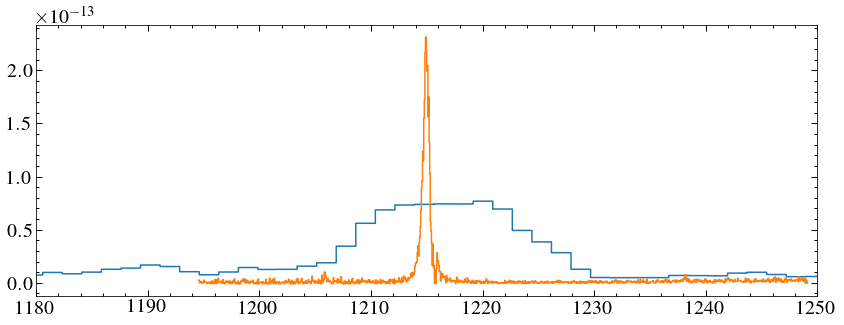

In [13]:
smooth =2
for rootname in rootnames[0:1]:
    w = fits.getdata('{}{}_c0f.fits'.format(path, rootname))[0]
    f = fits.getdata('{}{}_c1f.fits'.format(path, rootname))[0]
    e = fits.getdata('{}{}_c2f.fits'.format(path, rootname))[0]
    q = fits.getdata('{}{}_cqf.fits'.format(path, rootname))[0]
    f = convolve(f,Box1DKernel(smooth))
    e = convolve(e,Box1DKernel(smooth))/(smooth**0.5)
    plt.step(w[q<200],f[q<200], where='mid')  
    
stisdata = fits.getdata('/media/david/2tb_ext_hd/hddata/eg_uma/hst/stis/oehua1010_x1d.fits',1)[0]
plt.step(stisdata['WAVELENGTH'],stisdata['FLUX'], where='mid')
plt.xlim(1180, 1250)

(0.0, 1e-13)

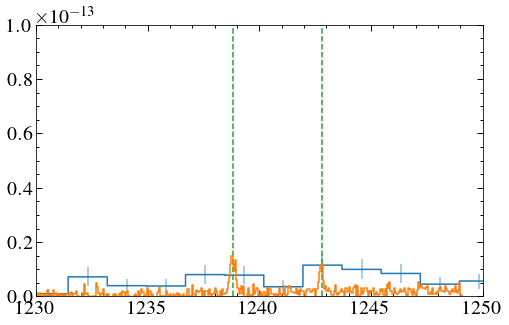

In [14]:
lines = [1206.499, 1238.821, 1242.804]


# mglines = [2796.35, 2803.53]

plt.figure(figsize=(8,5))
for rootname in rootnames[0:1]:
    w = fits.getdata('{}{}_c0f.fits'.format(path, rootname))[0]
    f = fits.getdata('{}{}_c1f.fits'.format(path, rootname))[0]
    e = fits.getdata('{}{}_c2f.fits'.format(path, rootname))[0]
    q = fits.getdata('{}{}_cqf.fits'.format(path, rootname))[0]
    plt.step(w[q<200],f[q<200], where='mid')
    plt.errorbar(w[q<200], f[q<200], yerr=e[q<200], ls='none', c='C0', alpha =0.5)
[plt.axvline(line, ls='--', c='C2') for line in lines]
stisdata = fits.getdata('/media/david/2tb_ext_hd/hddata/eg_uma/hst/stis/oehua2010_x1d.fits',1)[0]

plt.step(stisdata['WAVELENGTH'],stisdata['FLUX'], where='mid')

plt.xlim(1230, 1250)
plt.ylim(0, 1e-13)